## ANALYTICAL AND NUMERICAL SOLUTIONS TO ECOLOGICAL GROWTH MODELS

Analytical and Numerical methods: what's the difference?

**Analytical** solutions are exact and obtained by methods of symbolic manipulation, derived using mathematical analysis. 

**Numerical** solutions usually indicate an approximate solution obtained by numerical analysis methods. 

### EXPONENTIAL GROWTH MODEL 

Growth mechanism modelled by a simple ordinary differential equation:

\begin{equation}
\frac{\partial N}{\partial t} = r N(t)
\end{equation}

where $N$ is the number of individuals in the population, $t$ is time (in an appropriate unit), and $r$ is the population growth rate. 
This differential equation can be very easily solved for $N(t)$, and the analytical solution is:

\begin{equation}
N(t) = N_{0}e^{rt}
\end{equation}

In [1]:
#import libraries
import numpy as np
import sympy 
import math
from matplotlib import pyplot
%matplotlib inline

#define plotting parameters
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

#import color maps
import matplotlib.cm as cm

#### a) ANALYTICAL SOLUTION

In [3]:
#define a function that calculates the exact solution of an exponential growth model

def exact_solution_exp(N_0, t, r):
    # n_0: initial population size
    # t: time
    # r: population growth rate    
    return N_0*np.exp(r*t)

Text(0, 0.5, 'N')

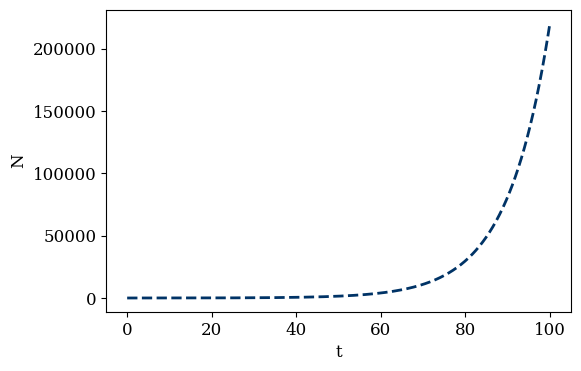

In [106]:
# population parameters
N_0 = 10 # Initial population size
r = 0.1 # Population growth rate

# time parameters
T = 100 # Total time in arbitrary unit of time
dt = 0.1 # Time step
nt = int(T / dt) + 1 # Number of time steps

#set up the temporal grid
x = np.linspace(0,T,nt)

#calculate the exact solution for each time point
N_a = np.asarray([exact_solution_exp(N_0,t,r) for t in x])

# plot graph
pyplot.figure(figsize=(6,4), dpi=100)
pyplot.plot(x,N_a, color='#003366', ls='--', lw=2)

pyplot.xlabel("t")
pyplot.ylabel("N")

Calculate and plot analytical solutions for different initial population sizes

In [107]:
# population parameters
N_0 = [10,20,40,80,160] # Initial population sizes
r = 0.05 # Population growth rate

# time parameters
T = 100 # Total time in arbitrary unit of time
dt = 0.1 # Time step
nt = int(T / dt) + 1 # Number of time steps

# store all solutions in a 2D array
N_all = np.empty((len(N_0),nt))

# set up the temporal grid
x = np.linspace(0,T,nt)

# calculate all solutions
for i, n_0 in enumerate(N_0):
    N_all[i][:] = np.asarray([exact_solution_exp(n_0,t,r) for t in x])

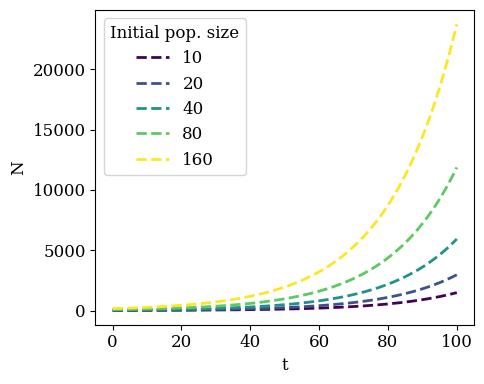

In [108]:
# plot all solutions graph
pyplot.figure(figsize=(5,4), dpi=100)

# color map
colors = cm.viridis(np.linspace(0, 1, len(N_0)))

#plot solutions at each time point
for i, n_0 in enumerate(N_0):
    pyplot.plot(x,N_all[i][:], color=colors[i], ls='--', lw=2, label = str(n_0))

#pyplot.title("Population growth \ngrowth rate = 0.05")
pyplot.legend(title = "Initial pop. size")
pyplot.xlabel("t")
pyplot.ylabel("N")
pyplot.tight_layout()
pyplot.savefig("1e.svg")

Calculate and plot analytical solutions for different population growth rates

In [109]:
# population parameters
N_0 = 10 # Initial population size
R = [0.1, 0.2, 0.3, 0.4] # Population growth rate

# time parameters
T = 10 # Total time in arbitrary unit of time
dt = 0.1 # Time step
nt = int(T / dt) + 1 # Number of time steps

# store all solutions in a 2D array
N_all = np.empty((len(R),nt))

# set up the temporal grid
x = np.linspace(0,T,nt)

# calculate all solutions
for i, r in enumerate(R):
    N_all[i][:] = np.asarray([exact_solution_exp(N_0,t,r) for t in x])

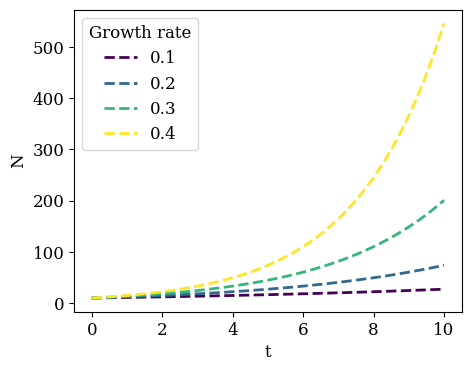

In [110]:
# plot all solutions graph
pyplot.figure(figsize=(5,4), dpi=100)

# color map
colors = cm.viridis(np.linspace(0, 1, len(R)))

#plot solutions at each time point
for i, r in enumerate(R):
    pyplot.plot(x,N_all[i][:], color=colors[i], ls='--', lw=2, label = str(r))

#pyplot.title("Population growth \ninitial pop. size = 10")
pyplot.legend(title = "Growth rate")
pyplot.xlabel("t")
pyplot.ylabel("N")
pyplot.savefig("2e.svg")

Interactive plot of population growth

In [111]:
from ipywidgets import interact, widgets

In [112]:
def plot_geo_exact(r, N_0):

    #set up the temporal grid
    x = np.linspace(0,T,nt)

    #calculate the exact solution at T0 
    N_a = np.asarray([exact_solution_exp(N_0,t,r) for t in x])
    
    pyplot.figure(figsize=(6,4), dpi=100)
    pyplot.plot(x,N_a, color='#003366', ls='--', lw=2)

    pyplot.xlabel("t")
    pyplot.ylabel("N")
    pyplot.ylim(0,10000)

In [113]:
interact(plot_geo_exact,
         r = widgets.FloatSlider(min = 0., max = 1. ,value= 0.2),
         N_0 = widgets.IntSlider(min=0,max=100,value=10))

interactive(children=(FloatSlider(value=0.2, description='r', max=1.0), IntSlider(value=10, description='N_0')…

<function __main__.plot_geo_exact(r, N_0)>

#### b) NUMERICAL SOLUTION

The numerical solution consists of computing a sequence of approximate solutions. Some methods directly derive from the definition of derivative:

\begin{equation}
u'(t) = \lim_{\Delta t\rightarrow 0} \frac{u(t+\Delta t)-u(t)}{\Delta t}
\end{equation}

If the time step $\Delta t$ is already very small, the derivative can be approximated by dropping the limit:

\begin{equation}
u(t+\Delta t) \approx u(t) + u'(t) \Delta t 
\end{equation}

also written as

\begin{equation}
u_{n+1} = u_n +  u'(t) \Delta t.
\end{equation}

This formula is called **Euler's method**.

Let's recall the differential equation of the exponential growth model:

\begin{equation}
\frac{\partial N}{\partial t} = r N(t)
\end{equation}

Then its Euler formulation is: 

\begin{equation}
N_{n+1} = N_{n} + r N_{n} \Delta{t} 
\end{equation}



In [114]:
def numerical_solution_exp(nt, N_0, dt, r):

    # N_0: initial population size
    # t: temporal variable
    # r: rate of growth

    N = np.zeros(nt)
    N[0] = N_0
    
    for t in range(1, nt): 
    # Calculate the change in the number of cells. 
    # Update the number of cells at the current time point
        N[t] = N[t - 1] + N[t - 1] * r * dt
    
    return N

Text(0, 0.5, 'N')

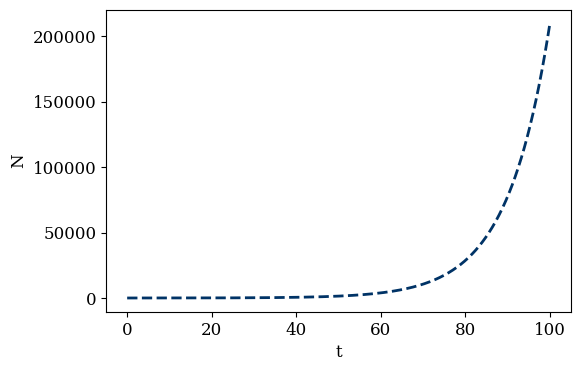

In [115]:
N_0 = 10 # Initial population size
r = 0.1 # Population growth rate

# time parameters
T = 100 # Total time in arbitrary unit of time
dt = 0.1 # Time step
nt = int(T / dt) + 1 # Number of time steps

#set up the temporal grid
x = np.linspace(0,T,nt)

#calculate the numerical solution
N_n = numerical_solution_exp(nt, N_0, dt, r)

# plot graph
pyplot.figure(figsize=(6,4), dpi=100)
pyplot.plot(x,N_n, color='#003366', ls='--', lw=2)

pyplot.xlabel("t")
pyplot.ylabel("N")

The L1 norm can be calculated to compare analytical and numerical solutions, and is defined as:

\begin{equation}
E = \Delta t \sum_{n=0}^N \left|a(t_n) - n(t_n)\right|
\end{equation}

where $a$ is the analytical solution and $n$ the numerical solution.

Text(0, 0.5, 'N')

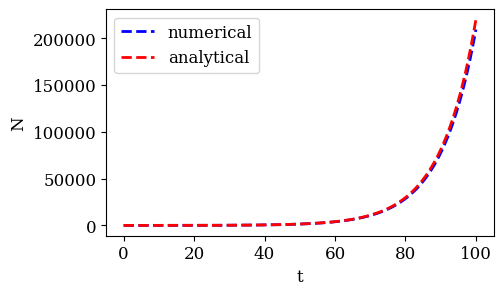

In [116]:
N_0 = 10 # Initial population size
r = 0.1 # Population growth rate

# time parameters
T = 100 # Total time in arbitrary unit of time
dt = 0.1 # Time step
nt = int(T / dt) + 1 # Number of time steps

#set up the temporal grid
x = np.linspace(0, T, nt)

N_a = np.asarray([exact_solution_exp(N_0,t,r) for t in x])
N_n = numerical_solution_exp(nt, N_0, dt, r)

pyplot.figure(figsize=(5,3), dpi=100)
pyplot.plot(x,N_n, color='b', ls='--', lw=2, label= "numerical")
pyplot.plot(x,N_a, color='r', ls='--', lw=2, label= "analytical")

pyplot.legend()
pyplot.xlabel("t")
pyplot.ylabel("N")

In [117]:
# Computes the L1 norm of two arrays containing the numerical and analytical solution
def get_L1error(N_num, N_exact,dt):
    
    return dt * np.sum(np.abs(N_num - N_exact))

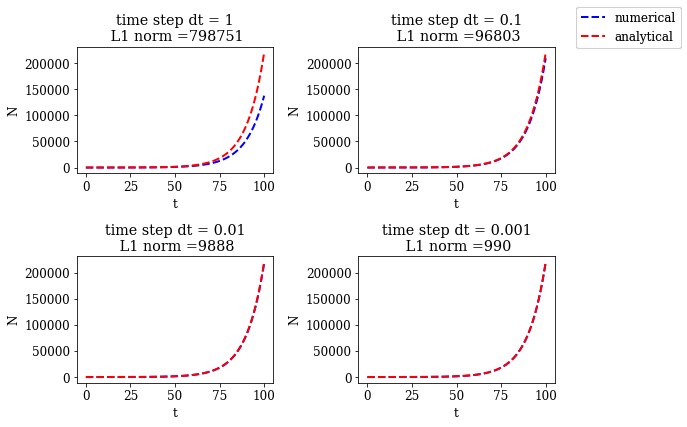

In [157]:
N_0 = 10 # Initial population size
r = 0.1 # Population growth rate

# time parameters
T = 100 # Total time in arbitrary unit of time
DT = [1, 0.1, 0.01, 0.001]

#plot graphs in 2 rows
rows = 2
cols = math.ceil(len(DT)/rows)
    
#plot analytical and numerical results for each time point
fig, axes = pyplot.subplots(nrows=rows, ncols=cols,figsize=(8,6))

err = np.empty((len(DT)))

for i,ax in enumerate(axes.flat):
    #get time step
    dt = DT[i]
    #calculate number of steps
    nt = int(T / dt) + 1 
    
    #calculate solutions
    x = np.linspace(0, T, nt)
    N_a = np.asarray([exact_solution_exp(N_0,t,r) for t in x])
    N_n = numerical_solution_exp(nt, N_0, dt, r)
    
    err[i] = get_L1error(N_n, N_a,dt)

    ax.plot(x, N_n, c = "b", ls = "--", lw=2, label = "numerical")
    ax.plot(x, N_a, c = "r", ls = "--", lw=2, label = "analytical")
    ax.set_title("time step dt = " + str(dt) + "\n L1 norm =" + str(int(err[i])) )
    
    ax.set_xlabel("t")
    ax.set_ylabel("N")
        
    #set unique legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1,1))
    
    pyplot.tight_layout()

pyplot.savefig("3e.svg")

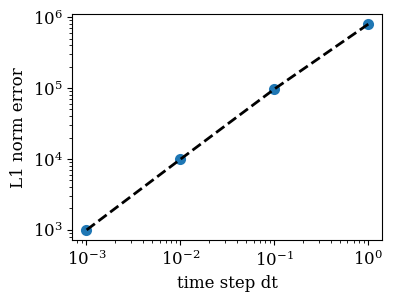

In [119]:
pyplot.figure(figsize=(4,3), dpi=100)

pyplot.loglog(DT,err, color="k", ls='--', lw=2, label = "")
pyplot.scatter(DT,err,  lw=2)
pyplot.xlabel("time step dt")
pyplot.ylabel("L1 norm error")
pyplot.savefig("4e.svg")

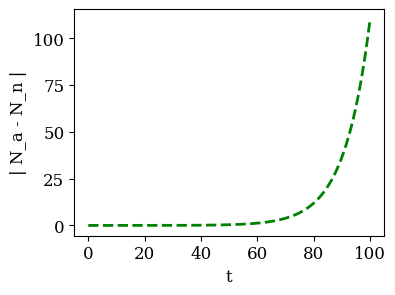

In [120]:
pyplot.figure(figsize=(4,3), dpi=100)

pyplot.plot(x,np.abs(N_a - N_n), color='g', ls='--', lw=2, label= "analytical")
pyplot.xlabel("t")
pyplot.ylabel("| N_a - N_n |")

pyplot.savefig("5e.svg")

### LOGISTIC GROWTH MODEL 

Growth mechanism modelled by aordinary differential equation

\begin{equation}
\frac{\partial N}{\partial t} = r N(t)(1 - \frac{N(t)}{K})
\end{equation}

where $N$ is the number of individuals in the population, $t$ is time (in an appropriate unit), and $r$ is the population growth rate, and K is the carrying capacity of the population. Also in this case, an analytical solution exists, even though it is not trivial to derive:

\begin{equation}
N(t) = \frac{K}{1 + Ae^{-rt}} 
\end{equation}
where 
\begin{equation}
A = \frac{K - N_{0}}{N_{0}}
\end{equation}

#### a) ANALYTICAL SOLUTION

In [158]:
def exact_solution_log(N_0, t, r, k):
    # n_0: initial population size
    # t: temporal variable
    # r: rate of growth    
    return k / (1 + ((k - N_0)/N_0)*np.exp(-r*t))

Text(0, 0.5, 'N')

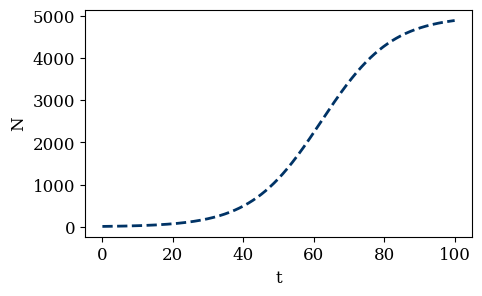

In [159]:
# Population parameters
N_0 = 10 # Initial population size
r = 0.1 # Population growth rate
k = 5000 # Carrying capacity 

# time parameters
T = 100 # Total time in arbitrary unit of time
dt = 0.1 # Time step
nt = int(T / dt) + 1 # Number of time steps

#set up the temporal grid
x = np.linspace(0,T,nt)
#calculate the exact solution at T0 
N_a = np.asarray([exact_solution_log(N_0,t,r,k) for t in x])

pyplot.figure(figsize=(5,3), dpi=100)
pyplot.plot(x,N_a, color='#003366', ls='--', lw=2)

pyplot.xlabel("t")
pyplot.ylabel("N")

Calculate and plot analytical solutions for different initial population sizes

In [161]:
# population parameters
N_0 = [10,20,40,80,160] # Initial population size
r = 0.1 # Population growth rate
k = 5000 # Carrying capacity 

# time parameters
T = 100 # Total time in arbitrary unit of time
dt = 0.1 # Time step
nt = int(T / dt) + 1 # Number of time steps

# store all solutions in a 2D array
N_all = np.empty((len(N_0),nt))

# set up the temporal grid
x = np.linspace(0,T,nt)

# calculate all solutions
for i, n_0 in enumerate(N_0):
    N_all[i][:] = np.asarray([exact_solution_log(n_0,t,r,k) for t in x])

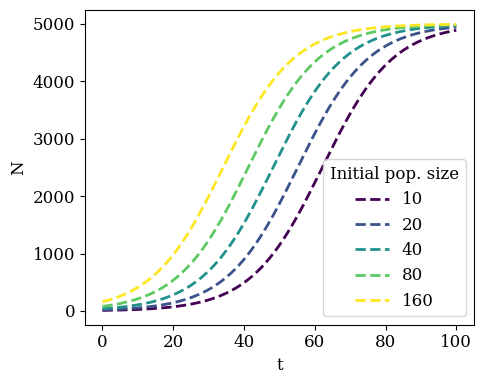

In [162]:
# plot all solutions graph
pyplot.figure(figsize=(5,4), dpi=100)

# color map
colors = cm.viridis(np.linspace(0, 1, len(N_0)))

#plot solutions at each time point
for i, n_0 in enumerate(N_0):
    pyplot.plot(x,N_all[i][:], color=colors[i], ls='--', lw=2, label = str(n_0))

pyplot.legend(title = "Initial pop. size")
pyplot.xlabel("t")
pyplot.ylabel("N")

pyplot.tight_layout()
pyplot.savefig("1l.svg")

In [163]:
# population parameters
N_0 = 10 # Initial population size
R = [0.1, 0.2, 0.3, 0.4] # Population growth rate
k = 5000 # Carrying capacity 

# time parameters
T = 100 # Total time in arbitrary unit of time
dt = 0.1 # Time step
nt = int(T / dt) + 1 # Number of time steps

# store all solutions in a 2D array
N_all = np.empty((len(R),nt))

# set up the temporal grid
x = np.linspace(0,T,nt)

# calculate all solutions
for i, r in enumerate(R):
    N_all[i][:] = np.asarray([exact_solution_log(N_0,t,r,k) for t in x])

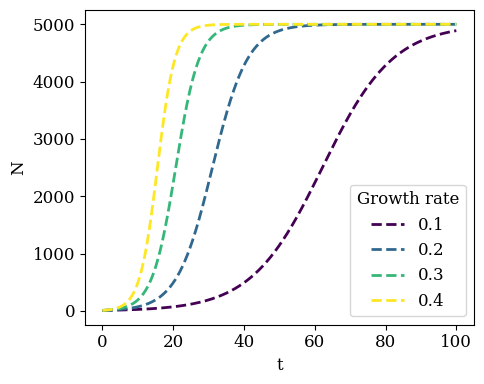

In [164]:
# plot all solutions graph
pyplot.figure(figsize=(5,4), dpi=100)

# color map
colors = cm.viridis(np.linspace(0, 1, len(R)))

#plot solutions at each time point
for i, r in enumerate(R):
    pyplot.plot(x,N_all[i][:], color=colors[i], ls='--', lw=2, label = str(r))

pyplot.legend(title = "Growth rate")
pyplot.xlabel("t")
pyplot.ylabel("N")

pyplot.tight_layout()
pyplot.savefig("2l.svg")

In [172]:
# population parameters
N_0 = 10 # Initial population size
r = 0.15 # Population growth rate
K = [10000,20000,30000,40000,50000] # Carrying capacity

# time parameters
T = 100 # Total time in arbitrary unit of time
dt = 0.1 # Time step
nt = int(T / dt) + 1 # Number of time steps

# store all solutions in a 2D array
N_all = np.empty((len(K),nt))

# set up the temporal grid
x = np.linspace(0,T,nt)

# calculate all solutions
for i, k in enumerate(K):
    N_all[i][:] = np.asarray([exact_solution_log(N_0,t,r,k) for t in x])

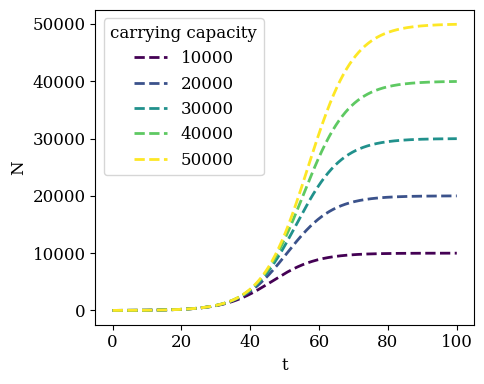

In [173]:
# plot all solutions graph
pyplot.figure(figsize=(5,4), dpi=100)

# color map
colors = cm.viridis(np.linspace(0, 1, len(K)))

#plot solutions at each time point
for i, k in enumerate(K):
    pyplot.plot(x,N_all[i][:], color=colors[i], ls='--', lw=2, label = str(k))

pyplot.legend(title = "carrying capacity")
pyplot.xlabel("t")
pyplot.ylabel("N")

pyplot.tight_layout()
pyplot.savefig("3l.svg")

#### b) NUMERICAL SOLUTION

The Euler formula for the logistic model is :

\begin{equation}
N_{n+1} = N_{n} + r N_{n} (1 - \frac{N_{n}}{K}) \Delta{t} 
\end{equation}

In [129]:
def numerical_solution_log(n_0, dt, r, k, nt):

    #n_0: initial population size
    #t: temporal variable
    #r: rate of growth

    N = np.zeros(nt)
    N[0] = n_0
    
    for t in range(1, nt): 
        N[t] = N[t - 1] + N[t - 1] * r * dt * (1 - (N[t - 1]/k))  
    return N

Text(0, 0.5, 'N')

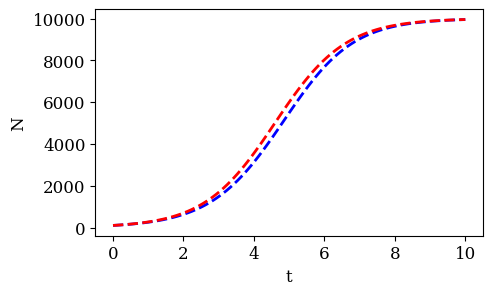

In [169]:
k = 10000 # Carrying capacity
n_0 = 100 # Initial number of individuals
r = 1 # Growth rate of individuals 
T = 10 # Total time of the integration
dt = 0.1 # time step

Nt = int(T/dt) 
#set up the temporal grid
x = np.linspace(0,T,Nt)

N_a = np.asarray([exact_solution_log(n_0,t,r, k) for t in x])
N_n = numerical_solution_log(n_0, dt, r, k, Nt)

pyplot.figure(figsize=(5,3), dpi=100)
pyplot.plot(x,N_n, color='b', ls='--', lw=2, label= "numerical")
pyplot.plot(x,N_a, color='r', ls='--', lw=2, label= "analytical")

pyplot.xlabel("t")
pyplot.ylabel("N")

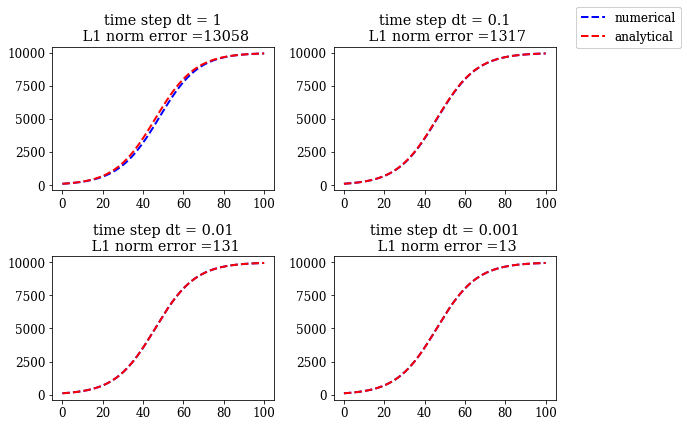

In [177]:
# population parameters
N_0 = 10 # Initial population size
r = 0.1 # Growth rate
k = 10000 # Population growth rate

# time parameters
T = 100 # Total time of integration
DT = [1, 0.1, 0.01, 0.001] # Time step

#plot graphs in 2 rows
rows = 2
cols = math.ceil(len(DT)/rows)
    
#plot analytical and numerical results for each time point
fig, axes = pyplot.subplots(nrows=rows, ncols=cols,figsize=(8,6))

err = np.empty((len(DT)))

for i, ax in enumerate(axes.flat):
    #get time step
    dt = DT[i]
    #calculate number of steps
    nt = int(T / dt) + 1 
    
    #calculate solutions
    x = np.linspace(0, T, nt)
    N_a = np.asarray([exact_solution_log(n_0,t,r,k) for t in x])
    N_n = numerical_solution_log(n_0, dt, r, k, nt)

    err[i] = get_L1error(N_n, N_a,dt)

    ax.plot(x, N_n, c = "b", ls = "--", lw=2, label = "numerical")
    ax.plot(x, N_a, c = "r", ls = "--", lw=2, label = "analytical")
    ax.set_title("time step dt = " + str(dt) + "\n L1 norm error =" + str(int(err[i])) )
        
    #set unique legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1,1))
    
    #set unique title
    #pyplot.suptitle("Fisher's equation solutions, dx =" + str(dx))
    pyplot.tight_layout()
    
pyplot.savefig("4l.svg")

Text(0, 0.5, 'L1 norm error')

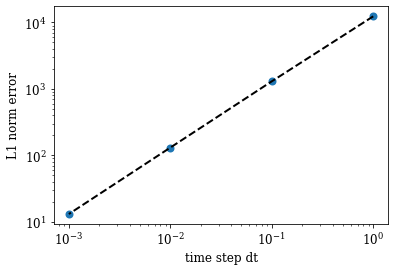

In [148]:
pyplot.loglog(DT,err, color="k", ls='--', lw=2, label = "")
pyplot.scatter(DT,err,  lw=2)
pyplot.xlabel("time step dt")
pyplot.ylabel("L1 norm error")

pyplot.savefig("5l.svg")

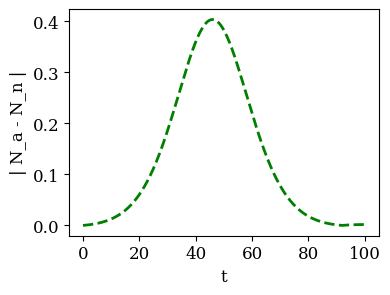

In [178]:
pyplot.figure(figsize=(4,3), dpi=100)

pyplot.plot(x,np.abs(N_a - N_n), color='g', ls='--', lw=2)
pyplot.xlabel("t")
pyplot.ylabel("| N_a - N_n |")

pyplot.savefig("5l.svg")

## CHANGING CARRYING CAPACITY

In [179]:
def numerical_solution_log_A1(n_0, dt, r, k, nt, fun):
   
    N = np.zeros(nt)
    K = np.zeros(nt)
    
    N[0] = n_0
    K[0] = fun(0, k)
    
    for t in range(1, nt): 
        
        K[t] = fun(t, k)
                
        N[t] = N[t - 1] + N[t - 1] * r * dt * (1 - (N[t - 1]/K[t]))  
        
    return N, K

In [216]:
def k_fun1(t,k):
    return k + t*k*0.01

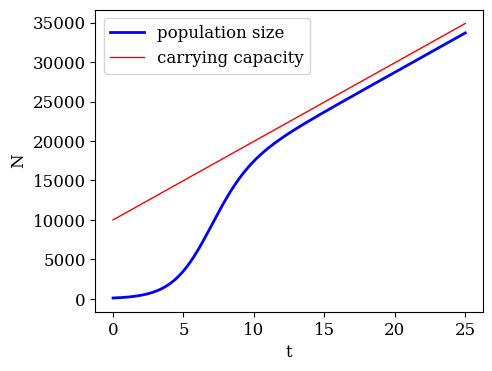

In [217]:
k = 10000
n_0 = 100 # Initial number of individuals
r = 0.8 # Growth rate of individuals 
T = 25 # Total time of the integration
dt = 0.1 # time step

Nt = int(T/dt) 
#set up the temporal grid
x = np.linspace(0,T,Nt)

N_n, K = numerical_solution_log_A1(n_0, dt, r, k, Nt, k_fun1)

pyplot.figure(figsize=(5,4), dpi=100)
pyplot.plot(x,N_n, color='b', ls='-', lw=2, label= "population size")
pyplot.plot(x,K, color='r', ls='-', lw=1, label= "carrying capacity")
pyplot.legend()

pyplot.xlabel("t")
pyplot.ylabel("N")

pyplot.savefig("1d.svg")

In [218]:
def k_fun2(t,k):
    return k - t*k*0.002

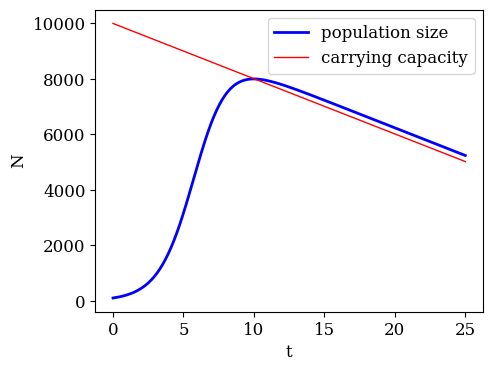

In [219]:
k = 10000
n_0 = 100 # Initial number of individuals
r = 0.8 # Growth rate of individuals 
T = 25 # Total time of the integration
dt = 0.1 # time step

Nt = int(T/dt) 
#set up the temporal grid
x = np.linspace(0,T,Nt)

N_n, K = numerical_solution_log_A1(n_0, dt, r, k, Nt, k_fun2)

pyplot.figure(figsize=(5,4), dpi=100)
pyplot.plot(x,N_n, color='b', ls='-', lw=2, label= "population size")
pyplot.plot(x,K, color='r', ls='-', lw=1, label= "carrying capacity")
pyplot.legend()

pyplot.xlabel("t")
pyplot.ylabel("N")

pyplot.savefig("2d.svg")

In [220]:
def k_fun3(t,k):
    return np.sin(0.2*t)*k*0.1 + k

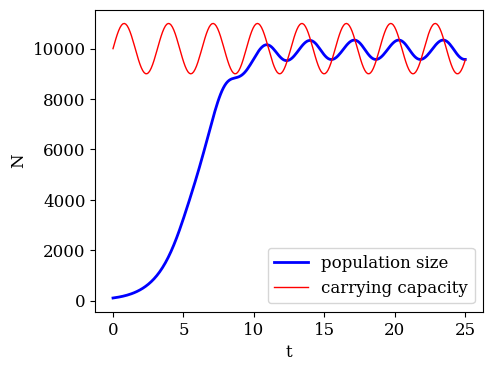

In [221]:
k = 10000
n_0 = 100 # Initial number of individuals
r = 0.8 # Growth rate of individuals 
T = 25 # Total time of the integration
dt = 0.1 # time step

Nt = int(T/dt) 
#set up the temporal grid
x = np.linspace(0,T,Nt)

N_n, K = numerical_solution_log_A1(n_0, dt, r, k, Nt, k_fun3)

pyplot.figure(figsize=(5,4), dpi=100)
pyplot.plot(x,N_n, color='b', ls='-', lw=2, label= "population size")
pyplot.plot(x,K, color='r', ls='-', lw=1, label= "carrying capacity")
pyplot.legend()

pyplot.xlabel("t")
pyplot.ylabel("N")

pyplot.savefig("3d.svg")

In [222]:
def k_fun4(t,k):
    if (int(t/20))%2 == 0:
        return 1.1*k
    else:
        return 0.9*k

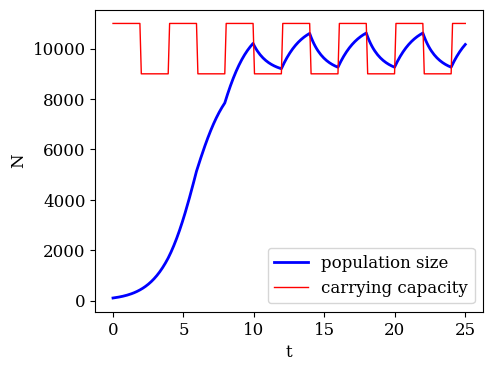

In [223]:
k = 10000
n_0 = 100 # Initial number of individuals
r = 0.8 # Growth rate of individuals 
T = 25 # Total time of the integration
dt = 0.1 # time step

Nt = int(T/dt) 
#set up the temporal grid
x = np.linspace(0,T,Nt)

N_n, K = numerical_solution_log_A1(n_0, dt, r, k, Nt, k_fun4)

pyplot.figure(figsize=(5,4), dpi=100)
pyplot.plot(x,N_n, color='b', ls='-', lw=2, label= "population size")
pyplot.plot(x,K, color='r', ls='-', lw=1, label= "carrying capacity")
pyplot.legend()

pyplot.xlabel("t")
pyplot.ylabel("N")

pyplot.savefig("4d.svg")

In [224]:
def k_fun5(t,k):
    return np.sin(0.2*t)*k*0.1 + np.sin(0.15*t)*k*0.1 + np.sin(0.1*t)*k*0.1 + k

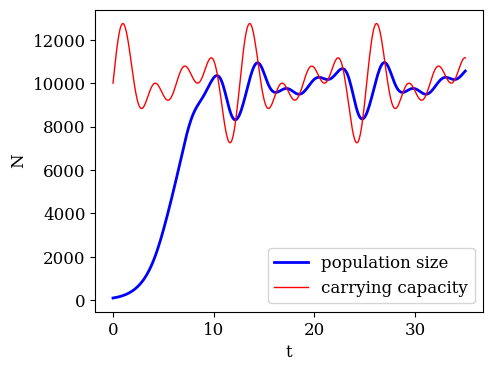

In [225]:
k = 10000
n_0 = 100 # Initial number of individuals
r = 0.8 # Growth rate of individuals 
T = 35 # Total time of the integration
dt = 0.1 # time step

Nt = int(T/dt) 
#set up the temporal grid
x = np.linspace(0,T,Nt)

N_n, K = numerical_solution_log_A1(n_0, dt, r, k, Nt, k_fun5)

pyplot.figure(figsize=(5,4), dpi=100)
pyplot.plot(x,N_n, color='b', ls='-', lw=2, label= "population size")
pyplot.plot(x,K, color='r', ls='-', lw=1, label= "carrying capacity")
pyplot.legend()

pyplot.xlabel("t")
pyplot.ylabel("N")

pyplot.savefig("5d.svg")

In [226]:
def k_fun6(t,k):
    return np.sin(0.2*t)*k*0.2 + k + t*k*0.01 

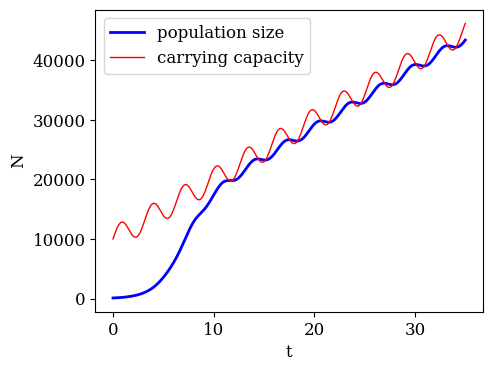

In [227]:
k = 10000
n_0 = 100 # Initial number of individuals
r = 0.8 # Growth rate of individuals 
T = 35 # Total time of the integration
dt = 0.1 # time step

Nt = int(T/dt) 
#set up the temporal grid
x = np.linspace(0,T,Nt)

N_n, K = numerical_solution_log_A1(n_0, dt, r, k, Nt, k_fun6)

pyplot.figure(figsize=(5,4), dpi=100)
pyplot.plot(x,N_n, color='b', ls='-', lw=2, label= "population size")
pyplot.plot(x,K, color='r', ls='-', lw=1, label= "carrying capacity")
pyplot.legend()

pyplot.xlabel("t")
pyplot.ylabel("N")

pyplot.savefig("6d.svg")